In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import platform

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
# data 경로
path = 'data'
train_path = os.path.join(path, 'train_features.csv')
label_path = os.path.join(path, 'train_labels.csv')
test_path = os.path.join(path, 'test_features.csv')
sub_path = os. path.join(path, 'sample_submission.csv')

x_train = pd.read_csv(train_path)
y_train = pd.read_csv(label_path)
x_test = pd.read_csv(test_path)
sub = pd.read_csv(sub_path)

# 데이터 설명


* 3축 가속도계(accelerometer)와 3축 자이로스코프(gyroscope)를 활용해 측정된 센서 데이터   





* train_features.csv (1875000, 8)   
    id 별 600 time 간 동작 데이터   
    id 3125개 x 600 time =1875000 데이터   




* train_labels.csv (3125, 3)   
    id 별 동작과 동작 label(61개)






* test_features.csv (469200, 8)   
    id 별 600 time간 동작 데이터   
    id 782개 x 600 time =469200 데이터




* sample_submission.csv (782, 62)   
    id별 동작을 예측해 작성하는 csv

In [4]:
# data info
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875000 entries, 0 to 1874999
Data columns (total 8 columns):
 #   Column  Dtype  
---  ------  -----  
 0   id      int64  
 1   time    int64  
 2   acc_x   float64
 3   acc_y   float64
 4   acc_z   float64
 5   gy_x    float64
 6   gy_y    float64
 7   gy_z    float64
dtypes: float64(6), int64(2)
memory usage: 114.4 MB


In [5]:
# data na check
# na 값 없음
x_train.isna().sum()

id       0
time     0
acc_x    0
acc_y    0
acc_z    0
gy_x     0
gy_y     0
gy_z     0
dtype: int64

In [6]:
# data 중복 확인
# 중복 없음
x_train.duplicated().sum()

0

Text(0.5, 1.0, '각 동작 별 데이터 수')

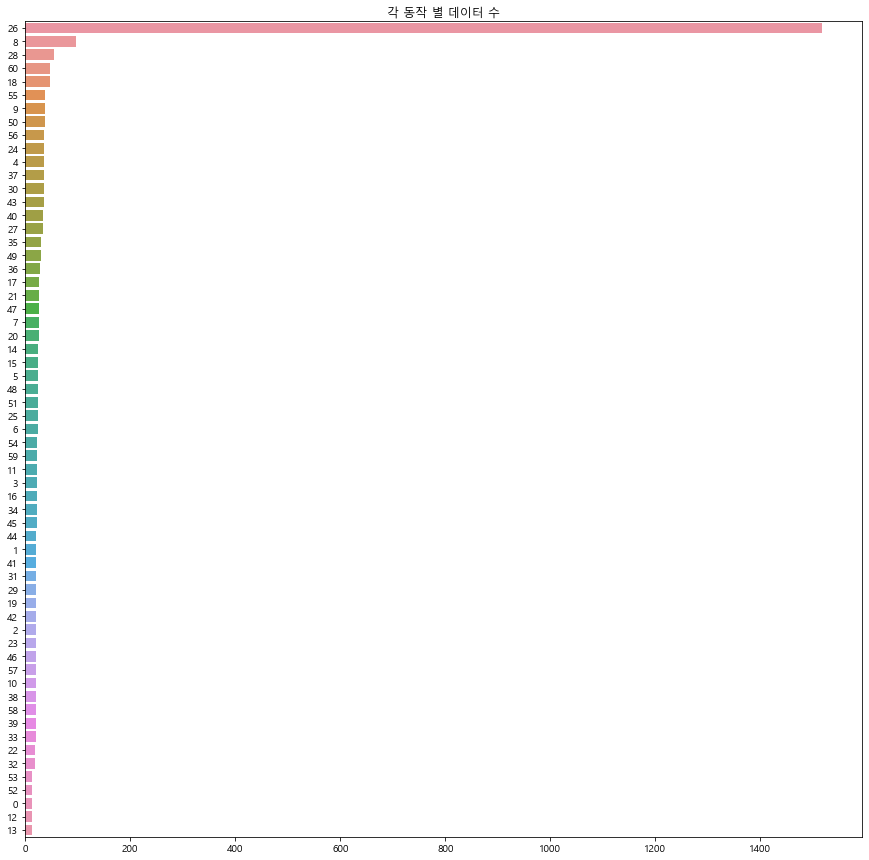

In [7]:
# 총 61가지의 동작으로 구성
# data imbalance가 매우 심하다.
labels = y_train['label'].value_counts()
plt.figure(figsize=(15,15))
sns.barplot(x=labels.values, y=labels.index.astype('string'))
plt.title('각 동작 별 데이터 수')

In [10]:
# train.csv 파일이 있으면 True 없으면 False
check = True   # 본인 상황에 맞춰 설정하시면 됩니다.

# train.csv 파일이 있으면 load
if check:
    train_path = os.path.join(path, 'train.csv')
    train = pd.read_csv(train_path)
# 없으면 train을 만들고 저장    
else:
    # x와 y를 합침
    ids = y_train['id'].values
    labels = y_train['label'].values
    train = x_train.copy()
    train['label'] = None

    for i, l in zip(ids, labels):
        print(i)
        mask = train['id'] == i

        train.loc[mask, 'label'] = l

    # 재사용을 위한 저장
    save_path = os.path.join(path, 'train.csv')
    train.to_csv(save_path, index=False)

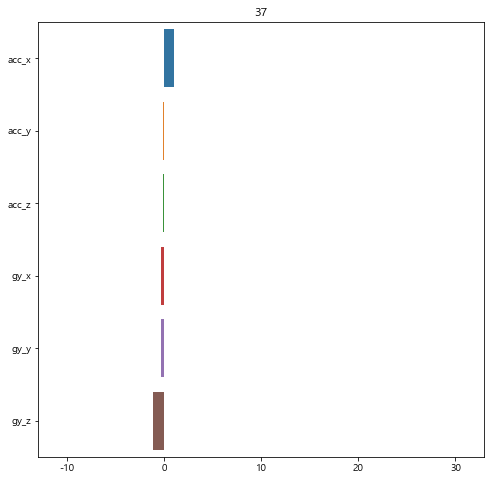

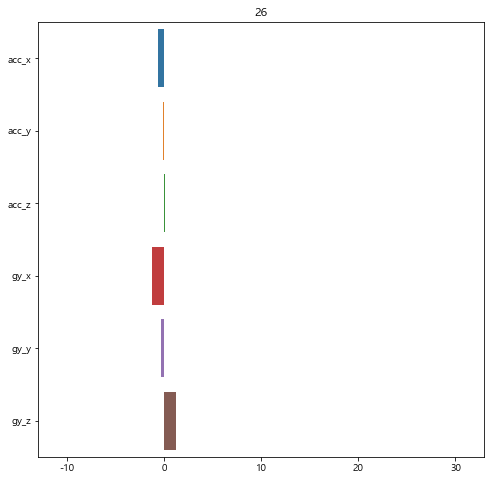

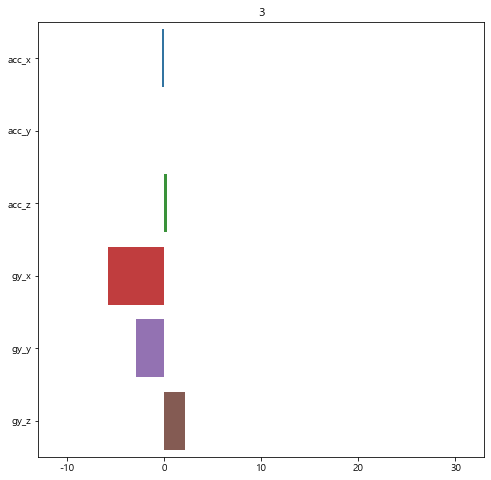

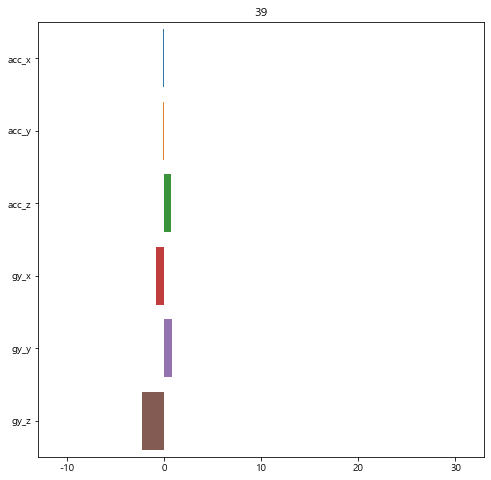

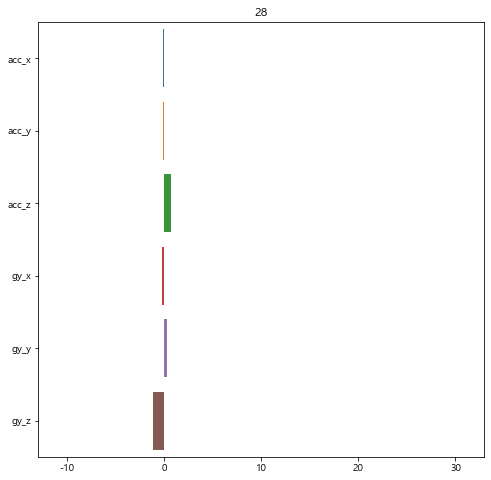

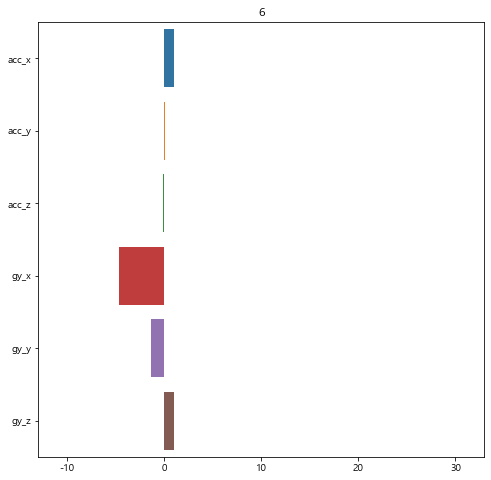

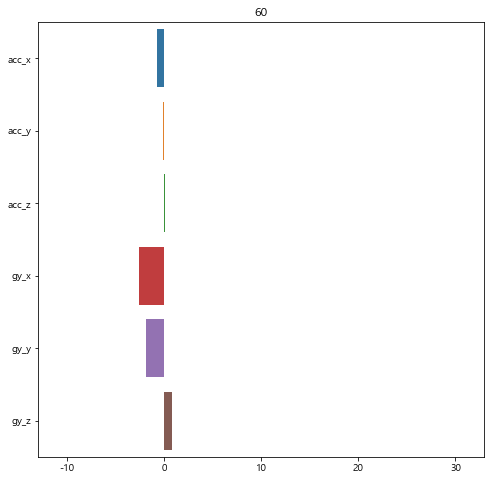

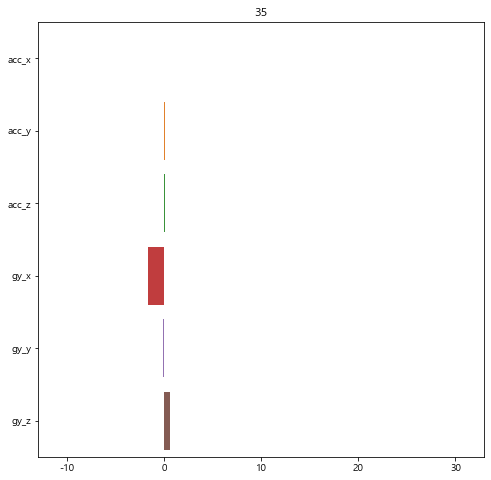

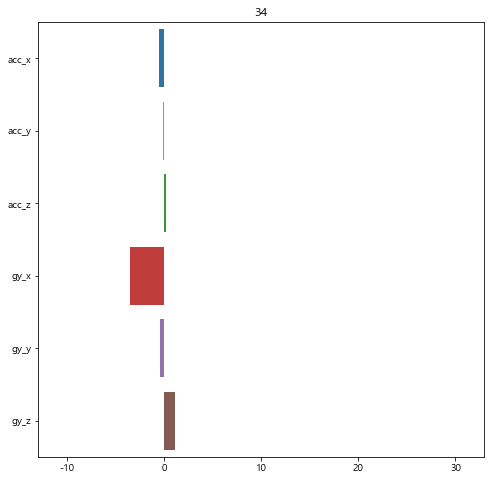

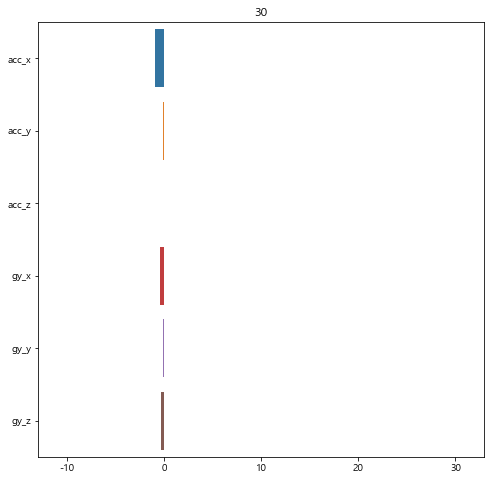

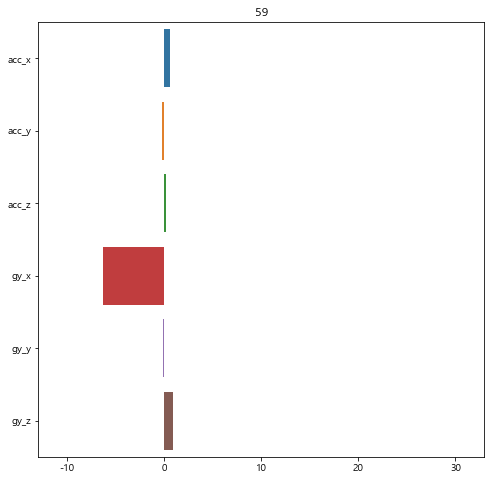

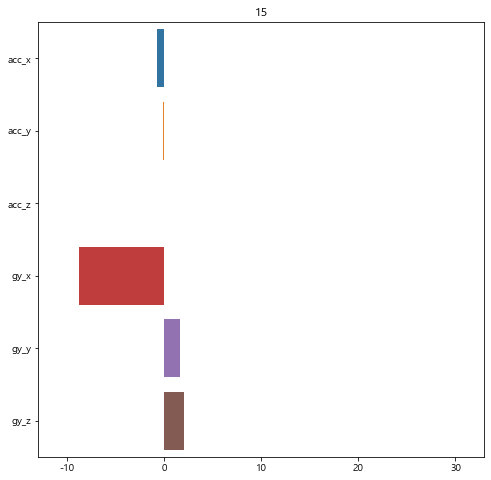

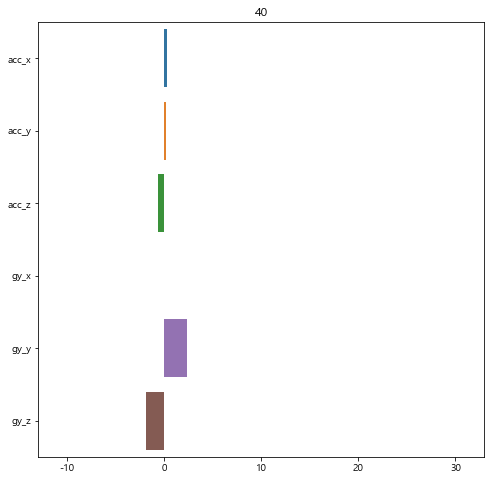

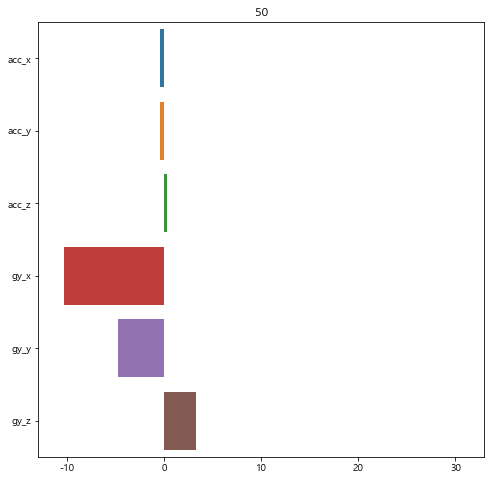

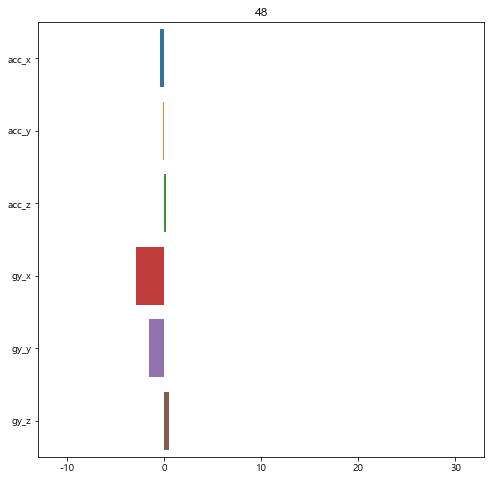

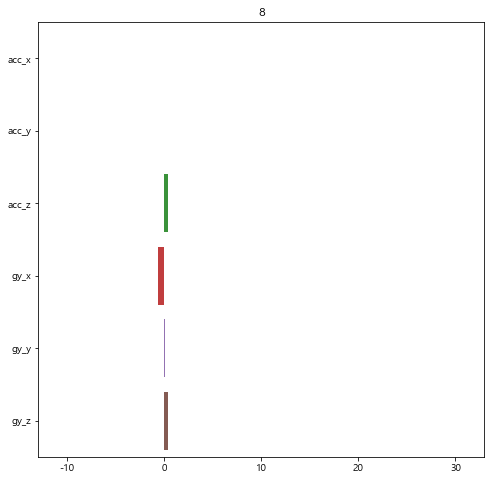

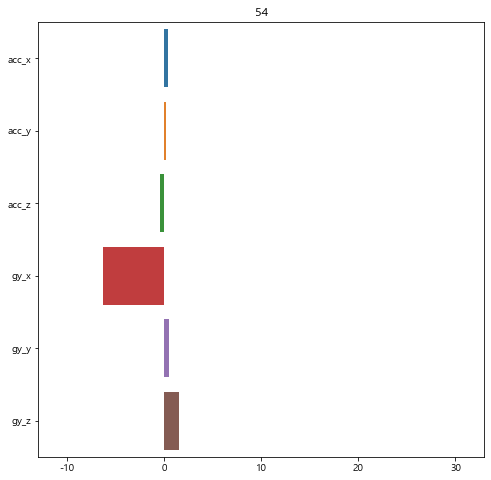

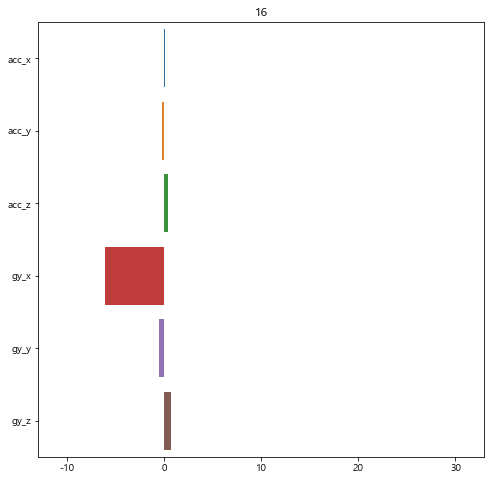

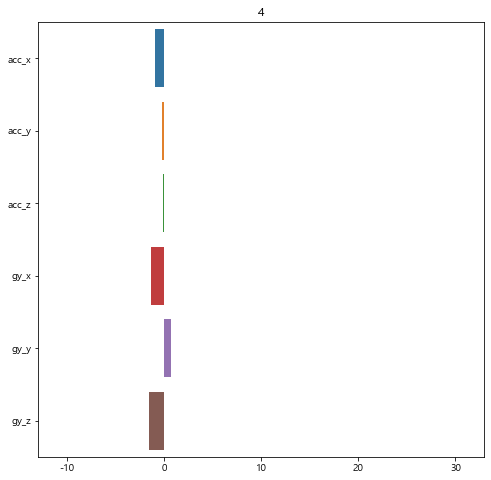

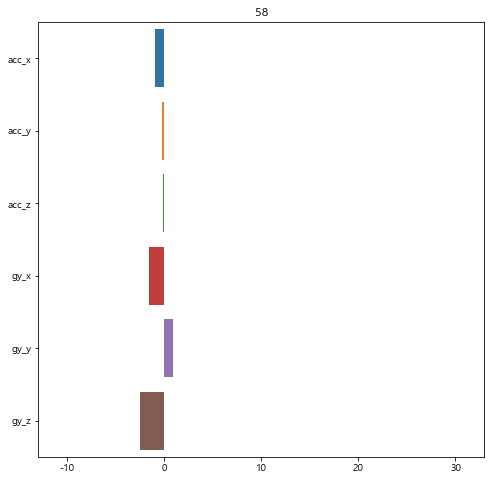

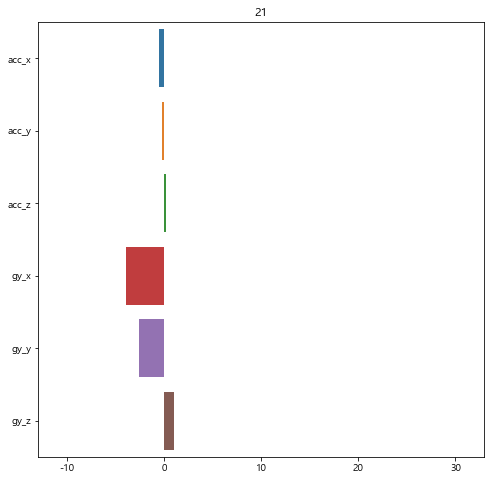

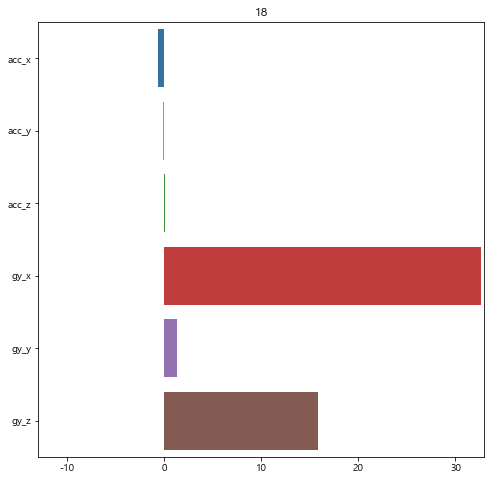

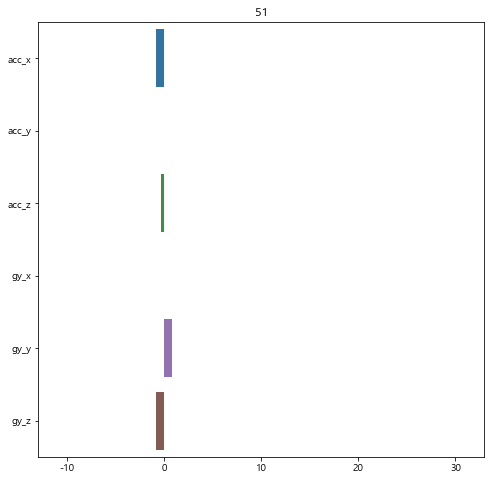

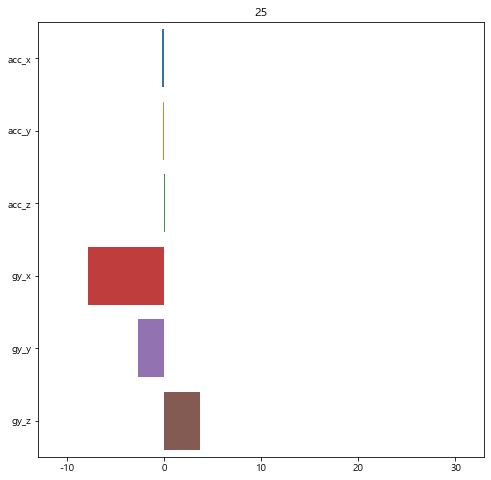

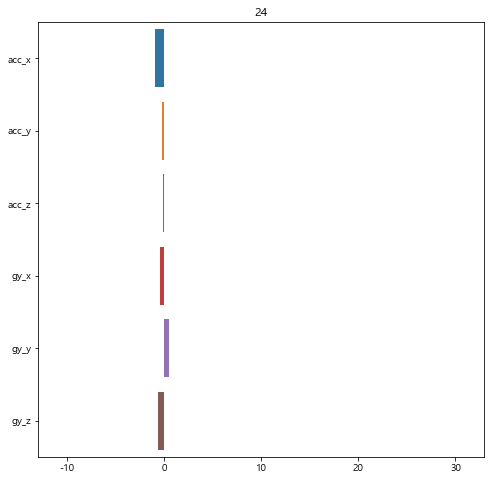

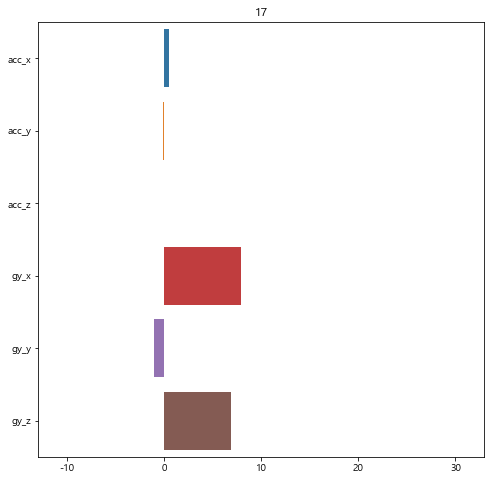

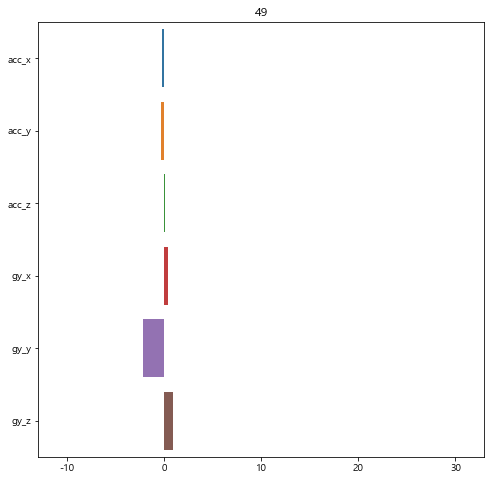

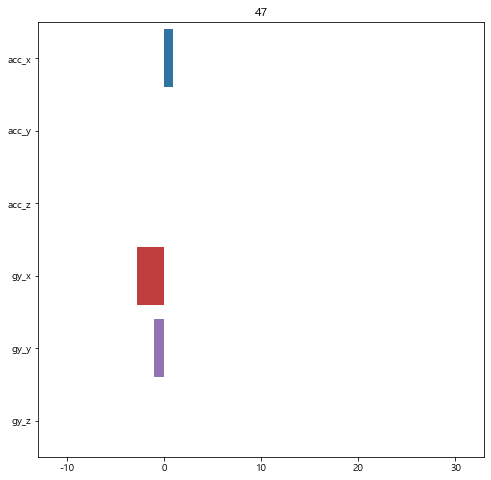

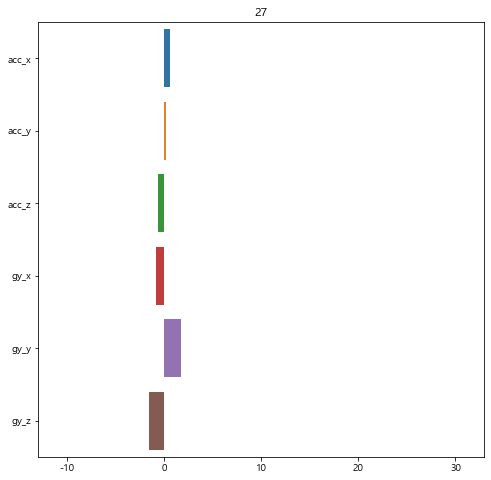

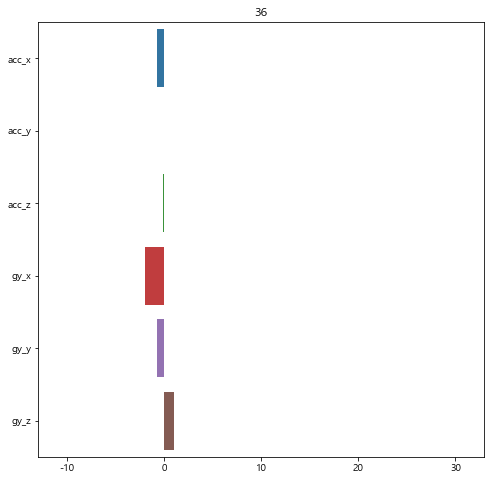

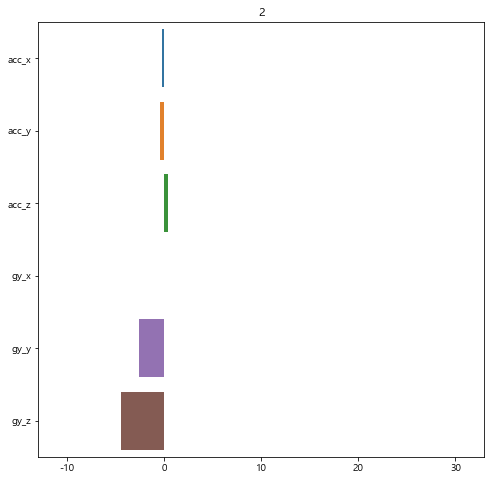

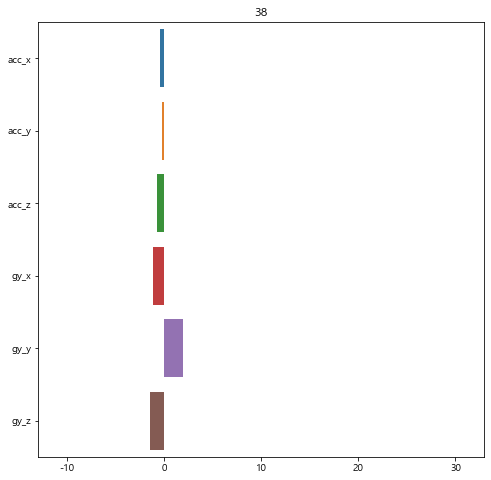

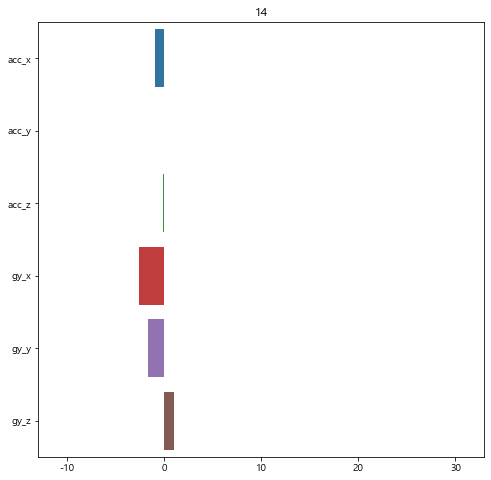

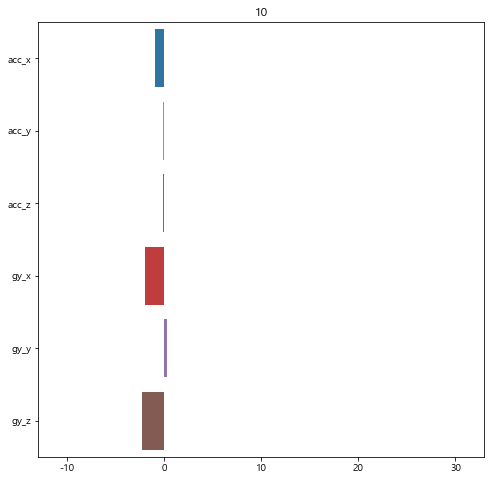

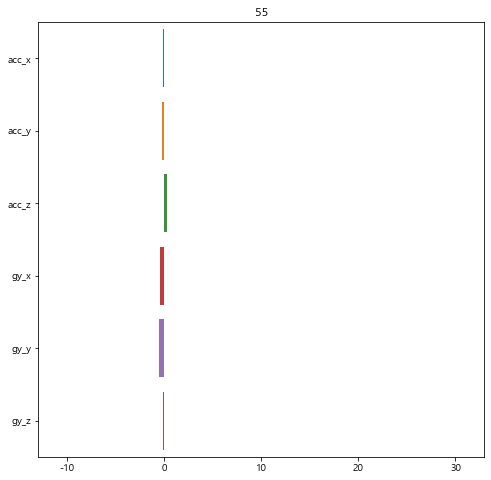

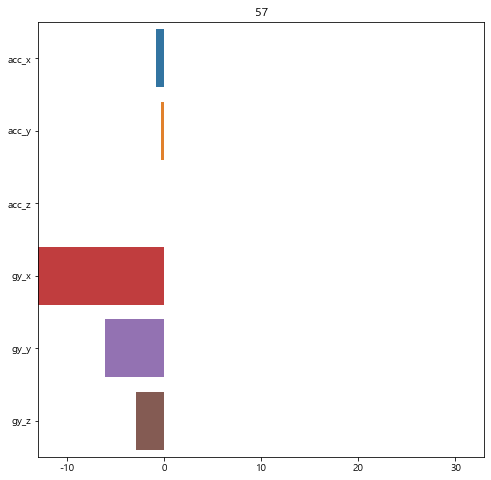

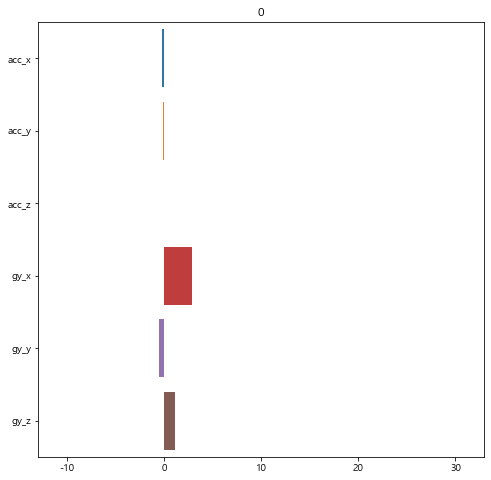

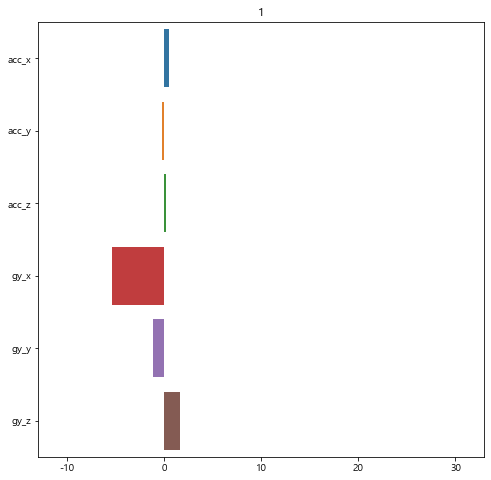

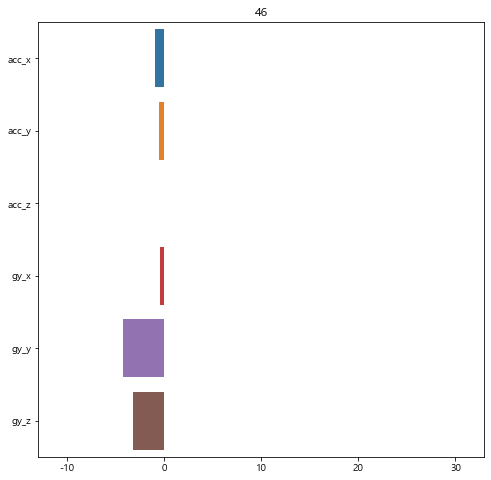

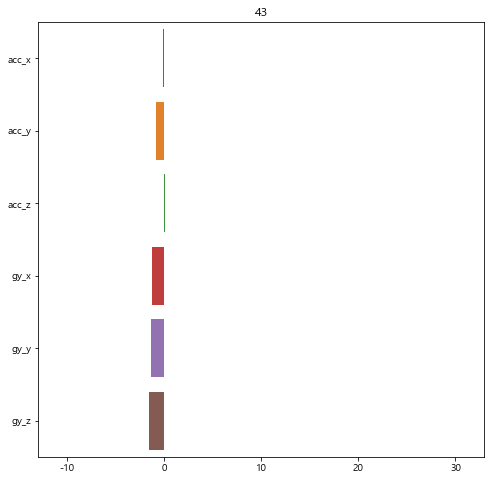

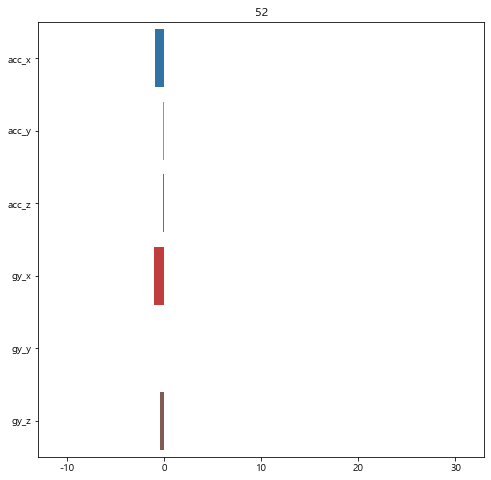

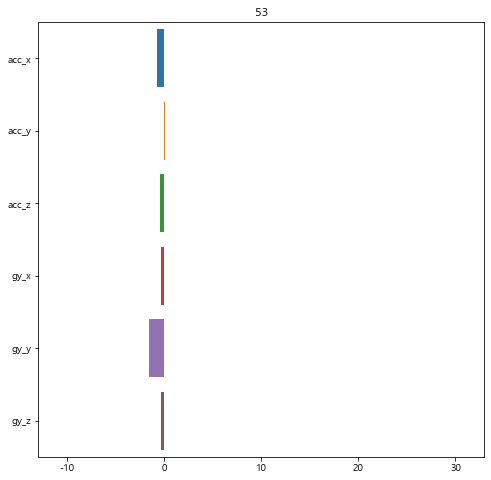

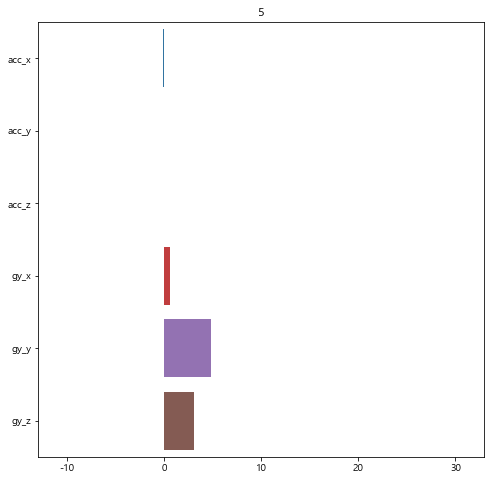

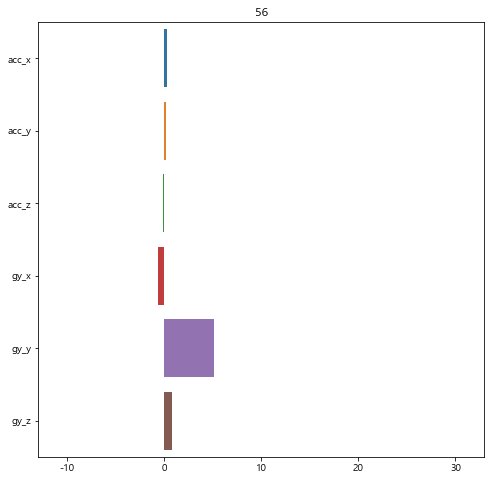

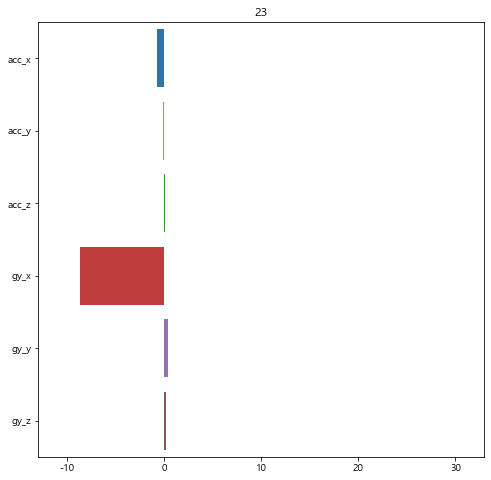

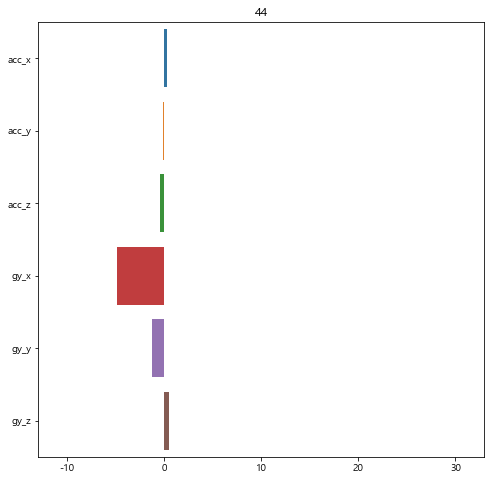

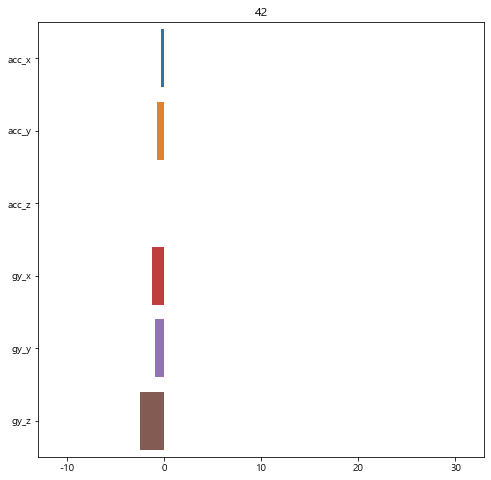

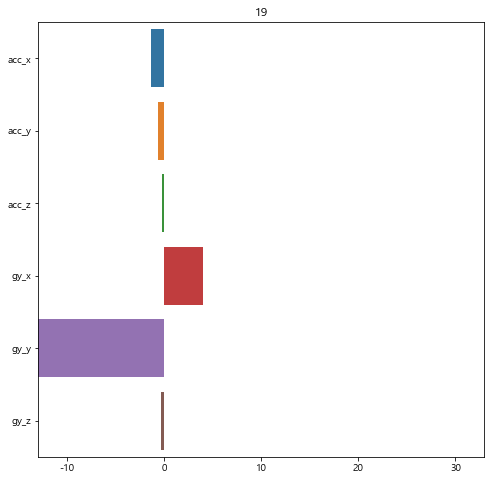

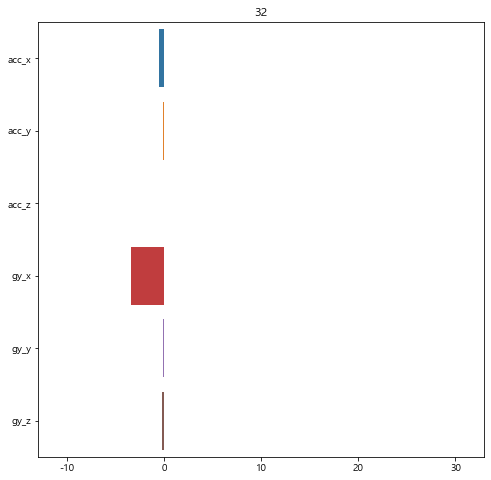

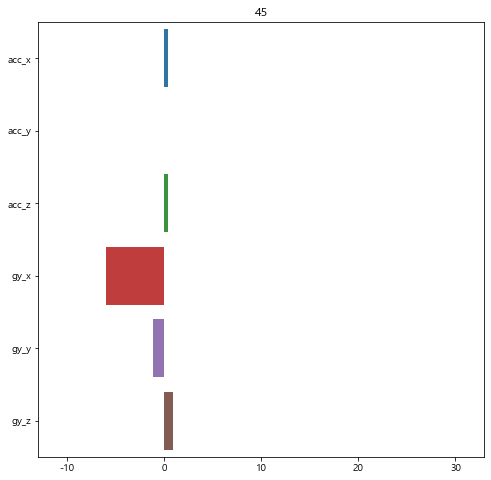

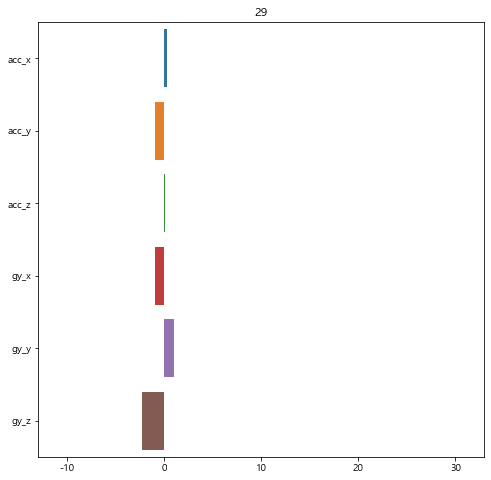

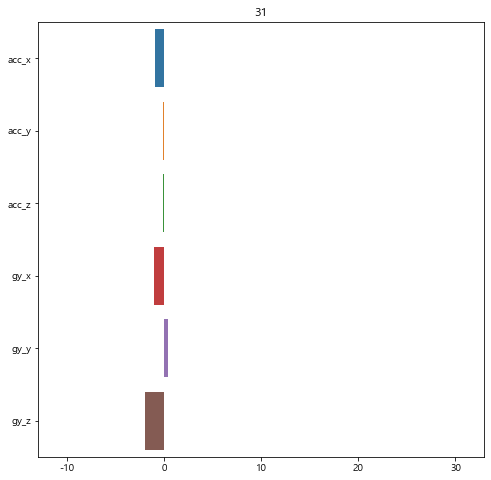

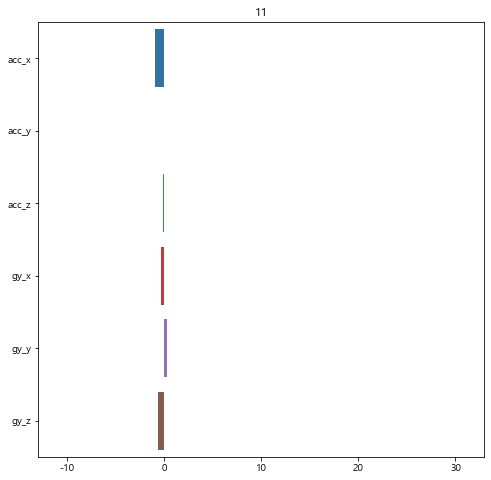

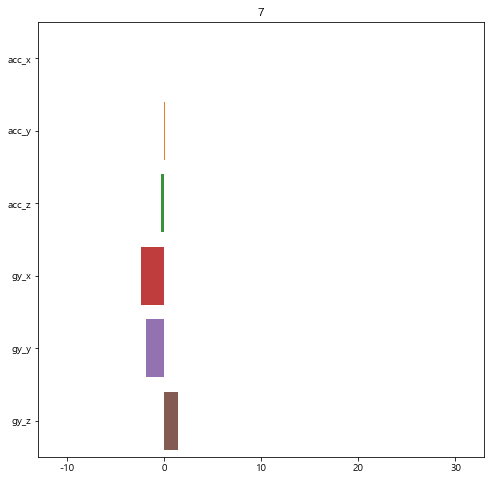

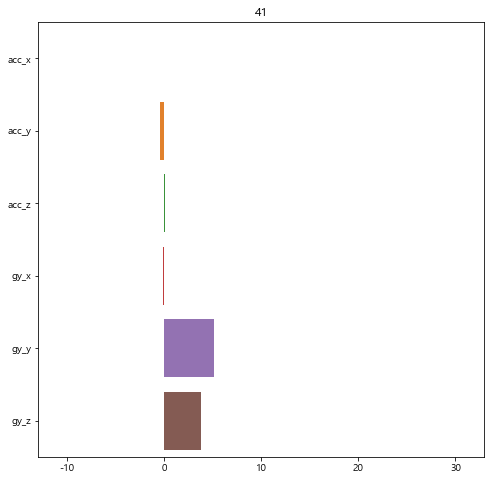

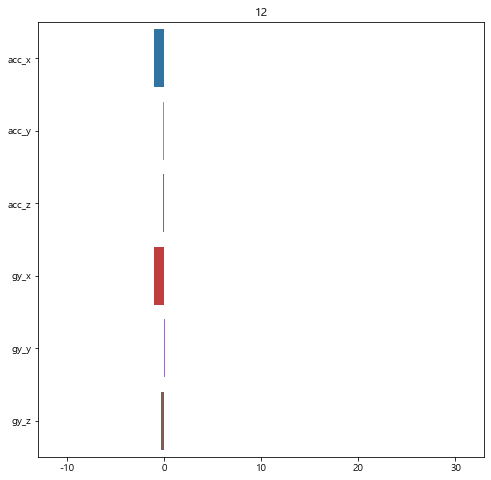

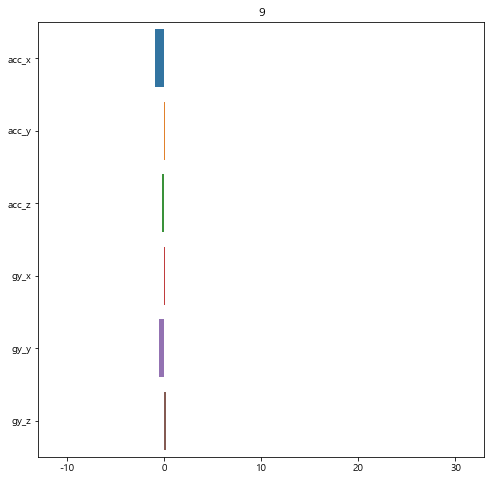

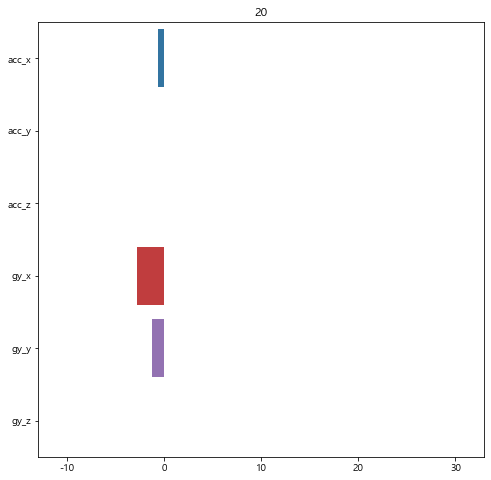

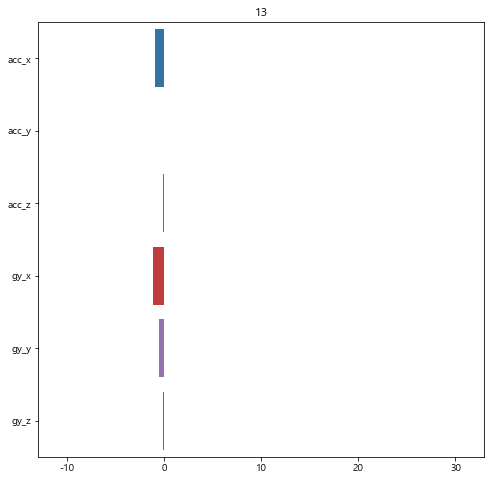

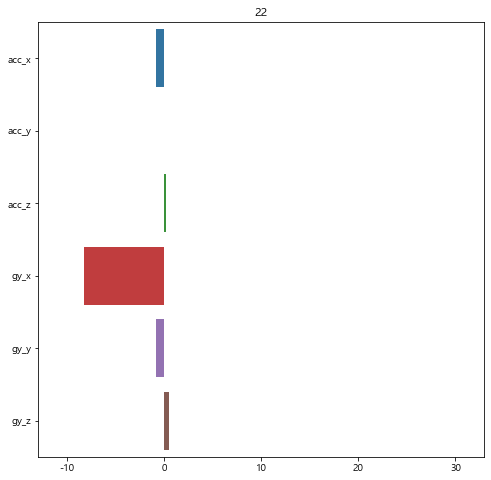

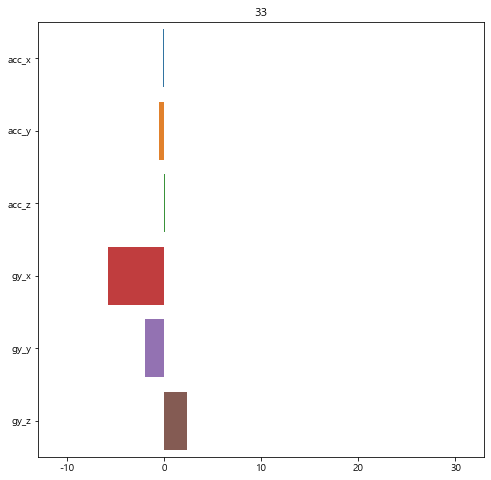

In [14]:
group = train.groupby('label')
labels = train['label'].unique()

for label in labels:
    plt.figure(figsize=(8, 8))
    df = group.get_group(label)
    df = df.drop(['id','time','label'], axis=1)
    mean_df = df.describe().loc['mean']
    sns.barplot(y=mean_df.index, x=mean_df.values)
    plt.xlim([-13, 33])
    plt.title(label)
    plt.show()
    